In [89]:
#Task 1: Data Cleaning and Preparation

In [88]:
import pandas as pd
import numpy as np

In [90]:
df = pd.read_csv("/content/Amazon.csv")

In [91]:
print(df.head)

<bound method NDFrame.head of                            Timestamp  age             Gender  \
0     2023/06/08 7:50:55 PM GMT+5:30   65  Prefer not to say   
1     2023/06/09 9:37:44 AM GMT+5:30   20               Male   
2    2023/06/11 11:26:54 PM GMT+5:30   42               Male   
3     2023/06/08 5:17:10 PM GMT+5:30   65             Others   
4    2023/06/11 10:59:30 PM GMT+5:30   45             Female   
..                               ...  ...                ...   
795   2023/06/07 6:15:10 PM GMT+5:30   26               Male   
796  2023/06/11 11:25:48 PM GMT+5:30   61             Others   
797  2023/06/07 10:21:00 PM GMT+5:30   67             Female   
798   2023/06/10 2:40:34 PM GMT+5:30   19             Others   
799   2023/06/05 8:49:12 PM GMT+5:30   10             Others   

         Purchase_Frequency  \
0    Less than once a month   
1               Once a week   
2               Once a week   
3              Once a month   
4               Once a week   
..             

In [92]:
# Remove duplicate or inconsistent survey responses.


In [93]:
df.drop_duplicates(inplace=True)

In [94]:
#Standardize categorical entries (e.g., frequency levels, gender, recommendation responses).

In [95]:
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].str.strip().str.lower()
    df["Gender"] = df["Gender"].replace({"m": "male", "f": "female","male ": "male", "female ": "female"})

In [96]:
print(df["Gender"])

0      prefer not to say
1                   male
2                   male
3                 others
4                 female
             ...        
795                 male
796               others
797               female
798               others
799               others
Name: Gender, Length: 800, dtype: object


In [97]:
freq_cols = ["Purchase_Frequency", "Shopping_Frequency"]
for col in freq_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()

In [98]:
existing_freq_cols = [col for col in freq_cols if col in df.columns]
df[existing_freq_cols].head()

,Purchase_Frequency
0,less than once a month
1,once a week
2,once a week
3,once a month
4,once a week


In [99]:
rec_cols = ["Recommendation", "Will_Recommend"]
for col in rec_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()
        df[col] = df[col].replace({"yes": "yes", "no": "no","y": "yes", "n": "no"})

In [100]:
existing_rec_cols = [c for c in rec_cols if c in df.columns]
if existing_rec_cols:
    print(df[existing_rec_cols])
else:
    print("None of the specified recommendation columns were found in the DataFrame.")

None of the specified recommendation columns were found in the DataFrame.


In [101]:
#Handle missing values and inconsistent formats in Product_Search_Method and other fields.

In [102]:
if "Product_Search_Method" in df.columns:
    df["Product_Search_Method"] = df["Product_Search_Method"].astype(str).str.strip().str.lower()
    df["Product_Search_Method"].replace({"nan": None, "": None, "-": None}, inplace=True)

categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

/tmp/ipython-input-2577896069.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Product_Search_Method"].replace({"nan": None, "": None, "-": None}, inplace=True)


In [103]:
#Rename duplicate or misformatted columns (e.g., remove trailing spaces in Rating_Accuracy )

In [104]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [105]:
print(df.columns)

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency', 'Recommendation_Helpfulness',
       'Rating_Accuracy', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'transaction'],
      dtype='object')


In [106]:
df.rename(columns={"Rating_Accuracy ": "Rating_Accuracy",}, inplace=True)

In [107]:
print(df.rename)

<bound method DataFrame.rename of                            Timestamp  age             Gender  \
0     2023/06/08 7:50:55 PM GMT+5:30   65  prefer not to say   
1     2023/06/09 9:37:44 AM GMT+5:30   20               male   
2    2023/06/11 11:26:54 PM GMT+5:30   42               male   
3     2023/06/08 5:17:10 PM GMT+5:30   65             others   
4    2023/06/11 10:59:30 PM GMT+5:30   45             female   
..                               ...  ...                ...   
795   2023/06/07 6:15:10 PM GMT+5:30   26               male   
796  2023/06/11 11:25:48 PM GMT+5:30   61             others   
797  2023/06/07 10:21:00 PM GMT+5:30   67             female   
798   2023/06/10 2:40:34 PM GMT+5:30   19             others   
799   2023/06/05 8:49:12 PM GMT+5:30   10             others   

         Purchase_Frequency  \
0    less than once a month   
1               once a week   
2               once a week   
3              once a month   
4               once a week   
..         

In [108]:
#Convert numerical rating columns (e.g., Customer_Reviews_Importance, Shopping_Satisfaction) to appropriate numeric types for analysis.

In [109]:
rating_columns = ["Customer_Reviews_Importance","Shopping_Satisfaction","Rating_Accuracy","Service_Rating","Product_Rating"]
for col in rating_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = df[col].fillna(df[col].median())

In [111]:
print("Cleaned Dataset")
df.head()

Cleaned Dataset


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,transaction
0,2023/06/08 7:50:55 PM GMT+5:30,65,prefer not to say,less than once a month,Clothing and Fashion,Yes,Multiple times a day,keyword,Multiple pages,2,...,Yes,Moderately,No,2,Sometimes,4,4,Competitive prices,better app interface and lower shipping charges,778242
1,2023/06/09 9:37:44 AM GMT+5:30,20,male,once a week,Groceries and Gourmet Food;Beauty and Personal...,No,Rarely,filter,First page,3,...,Yes,Heavily,Yes,1,Sometimes,4,5,Quick delivery,Scrolling option would be much better than goi...,193482
2,2023/06/11 11:26:54 PM GMT+5:30,42,male,once a week,Groceries and Gourmet Food;Beauty and Personal...,Sometimes,Few times a week,keyword,Multiple pages,2,...,Yes,Heavily,Sometimes,5,No,5,3,All the above,Nil,925975
3,2023/06/08 5:17:10 PM GMT+5:30,65,others,once a month,Beauty and Personal Care;Clothing and Fashion;...,No,Few times a month,filter,Multiple pages,2,...,Yes,Occasionally,No,3,Yes,1,2,Quick delivery,Quality of product is very poor according to t...,566872
4,2023/06/11 10:59:30 PM GMT+5:30,45,female,once a week,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,keyword,First page,5,...,Yes,Rarely,No,2,Yes,1,2,Quick delivery,Irrelevant product suggestions,683642


In [112]:
#Task 2: Descriptive Behavior Analysis

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


In [114]:
#Summarize customer demographics (age, gender distribution).

In [115]:
age_summary = df['age'].describe().to_frame(name='Age')
print("Age Summary Statistics")
print(age_summary)

Age Summary Statistics
              Age
count  800.000000
mean    35.170000
std     18.916485
min      3.000000
25%     19.000000
50%     35.500000
75%     51.000000
max     67.000000


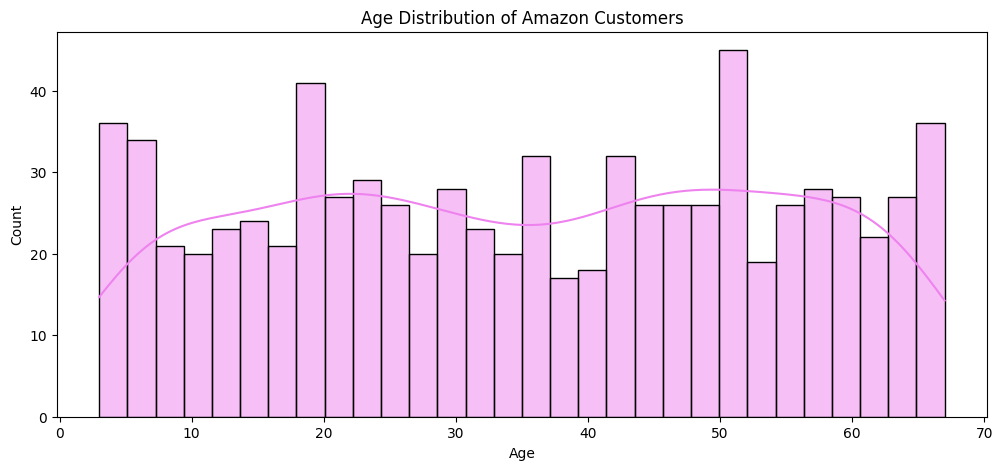

In [116]:
plt.figure(figsize=(12, 5))
sns.histplot(df['age'], bins=30, kde=True, color='Violet')
plt.title('Age Distribution of Amazon Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [117]:
gender_counts = df['Gender'].value_counts(normalize=True).mul(100).round(2).to_frame(name='Percentage')
print("Gender Distribution")
print(gender_counts)

Gender Distribution
                   Percentage
Gender                       
male                    26.12
others                  25.25
female                  24.62
prefer not to say       24.00


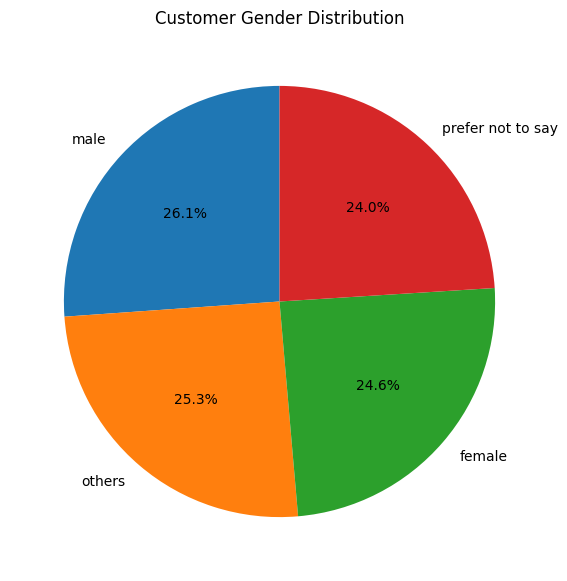

In [118]:
plt.figure(figsize=(7, 7))
gender_counts['Percentage'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Customer Gender Distribution')
plt.ylabel('')
plt.show()

In [119]:
#Analyze overall purchase frequency and most popular product categories.

In [120]:
purchase_freq = df['Purchase_Frequency'].value_counts(normalize=True).mul(100).round(2).to_frame(name='Percentage')
print("Purchase Frequency Distribution")
print(purchase_freq)

Purchase Frequency Distribution
                        Percentage
Purchase_Frequency                
once a month                 21.00
multiple times a week        19.88
once a week                  19.88
few times a month            19.75
less than once a month       19.50


/tmp/ipython-input-4114071473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=purchase_freq.index, x='Percentage', data=purchase_freq.reset_index(), palette='viridis')


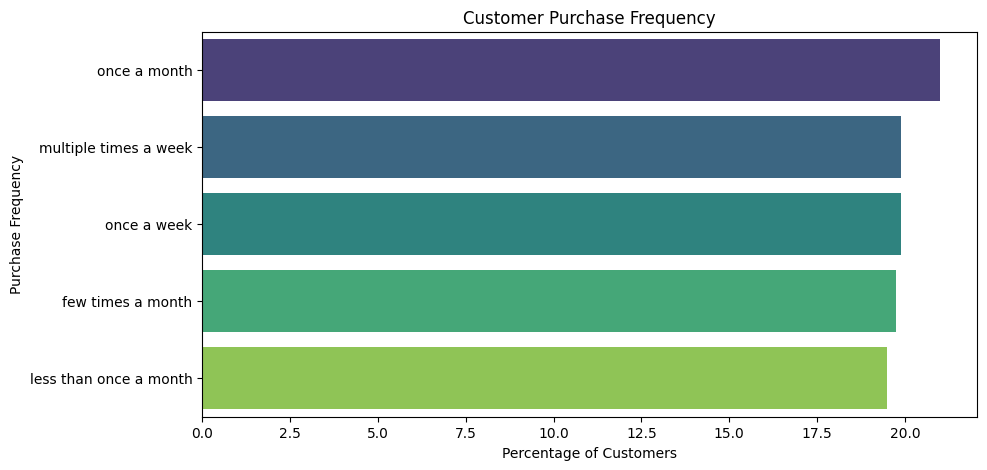

In [121]:
plt.figure(figsize=(10, 5))
sns.barplot(y=purchase_freq.index, x='Percentage', data=purchase_freq.reset_index(), palette='viridis')
plt.title('Customer Purchase Frequency')
plt.xlabel('Percentage of Customers')
plt.ylabel('Purchase Frequency')
plt.show()

In [122]:
category_series = df['Purchase_Categories'].str.split(';').explode().str.strip()
top_categories = category_series.value_counts().head(10)
print("Top 10 Most Popular Product Categories")
print(top_categories.to_frame(name='Count'))

Top 10 Most Popular Product Categories
                            Count
Purchase_Categories              
Clothing and Fashion          450
others                        412
Home and Kitchen              391
Beauty and Personal Care      383
Groceries and Gourmet Food    369


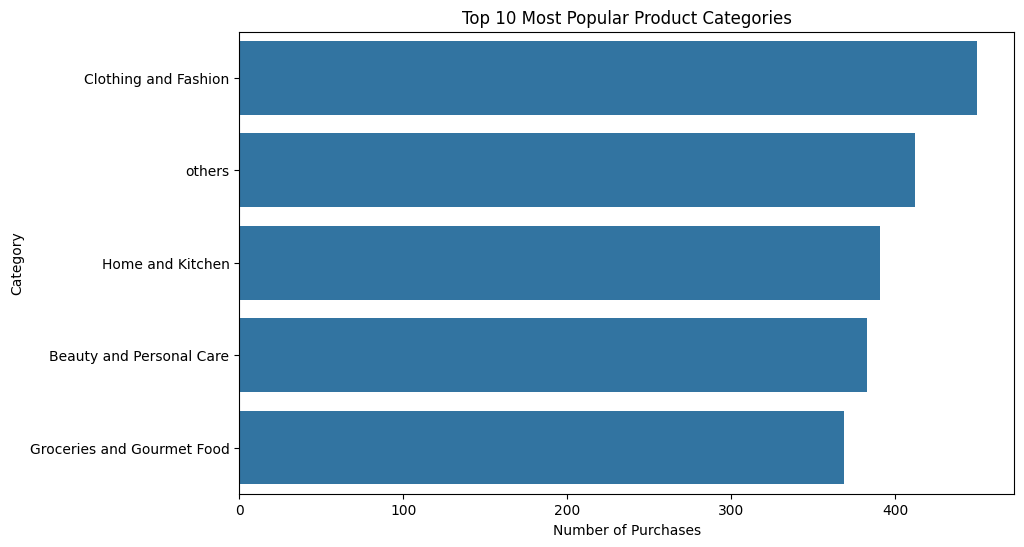

In [123]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_categories.index, x=top_categories.values)
plt.title('Top 10 Most Popular Product Categories')
plt.xlabel('Number of Purchases')
plt.ylabel('Category')
plt.show()

In [124]:
search_method = df['Product_Search_Method'].value_counts(normalize=True).mul(100).round(2).to_frame(name='Percentage')
print("Top Product Search Methods")
print(search_method)

Top Product Search Methods
                       Percentage
Product_Search_Method            
keyword                     40.88
categories                  20.38
filter                      20.12
others                      18.62


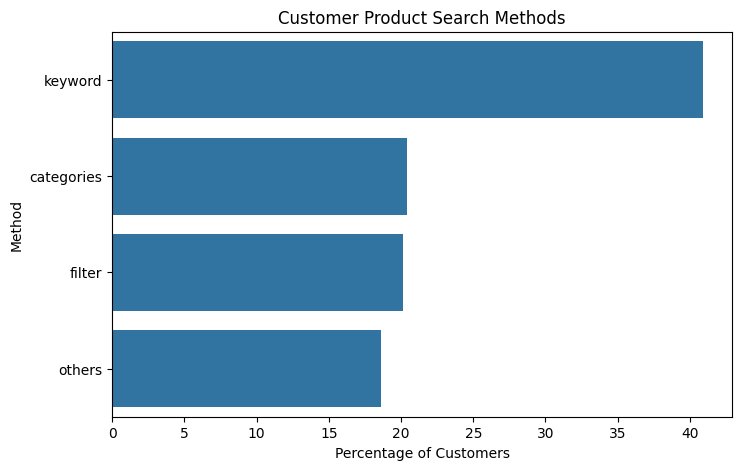

In [125]:
plt.figure(figsize=(8, 5))
sns.barplot(y=search_method.index, x='Percentage', data=search_method.reset_index())
plt.title('Customer Product Search Methods')
plt.xlabel('Percentage of Customers')
plt.ylabel('Method')
plt.show()

In [126]:
#Identify top browsing methods and most common cart abandonment factors.

In [127]:
abandonment_series = df['Cart_Abandonment_Factors'].str.split(',').explode().str.strip()
top_abandonment_factors = abandonment_series.value_counts().head(10)

print("Top Cart Abandonment Factors")
print(top_abandonment_factors.to_frame(name='Count'))

Top Cart Abandonment Factors
                                            Count
Cart_Abandonment_Factors                         
High shipping costs                           224
Found a better price elsewhere                206
Changed my mind or no longer need the item    194
others                                        176


/tmp/ipython-input-3709037528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_abandonment_factors.index, x=top_abandonment_factors.values, palette='rocket')


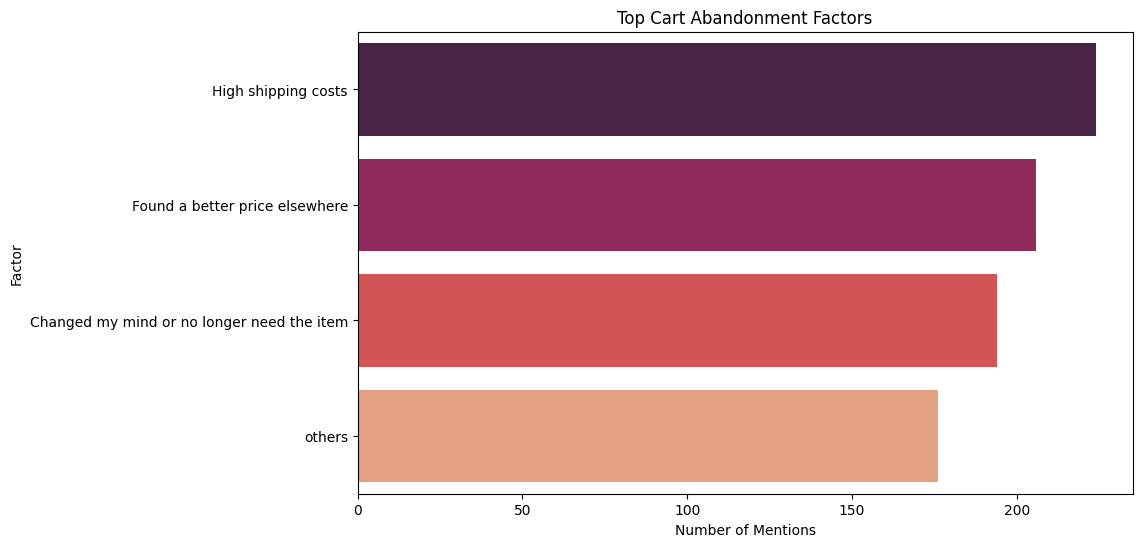

In [128]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_abandonment_factors.index, x=top_abandonment_factors.values, palette='rocket')
plt.title('Top Cart Abandonment Factors')
plt.xlabel('Number of Mentions')
plt.ylabel('Factor')
plt.show()

In [129]:
#Calculate mean and median satisfaction, recommendation helpfulness, and rating accuracy.

In [130]:
metrics_cols = ['Shopping_Satisfaction', 'Rating_Accuracy']
metrics_summary = df[metrics_cols].agg(['mean', 'median', 'std', 'min', 'max']).round(2)

print("Mean and Median of Key Metrics")
print(metrics_summary)

Mean and Median of Key Metrics
        Shopping_Satisfaction  Rating_Accuracy
mean                     3.01             2.97
median                   3.00             3.00
std                      1.41             1.40
min                      1.00             1.00
max                      5.00             5.00


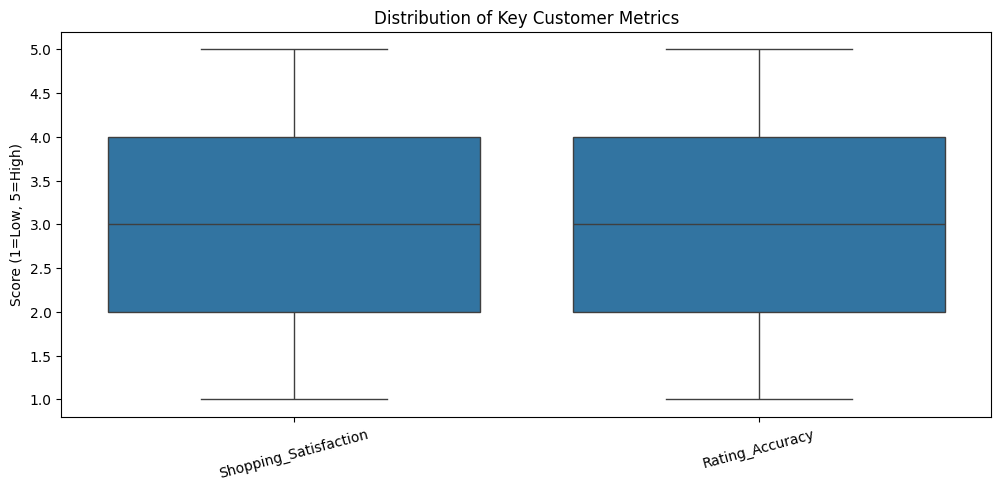

In [131]:
plt.figure(figsize=(12, 5))
metrics_plot_df = df[metrics_cols].melt(var_name='Metric', value_name='Score')
sns.boxplot(x='Metric', y='Score', data=metrics_plot_df)
plt.title('Distribution of Key Customer Metrics')
plt.ylabel('Score (1=Low, 5=High)')
plt.xlabel('')
plt.xticks(rotation=15)
plt.show()


In [132]:
#Generate summary statistics and visualizations for key behavioral variables.

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction,transaction
count,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,35.170000,3.058750,2.952500,2.968750,3.01250,556906.991250
std,18.916485,1.408111,1.420481,1.403651,1.40706,261823.943299
min,3.000000,1.000000,1.000000,1.000000,1.00000,101391.000000
25%,19.000000,2.000000,2.000000,2.000000,2.00000,332074.750000
50%,35.500000,3.000000,3.000000,3.000000,3.00000,563278.500000
75%,51.000000,4.000000,4.000000,4.000000,4.00000,780725.250000
max,67.000000,5.000000,5.000000,5.000000,5.00000,999892.000000


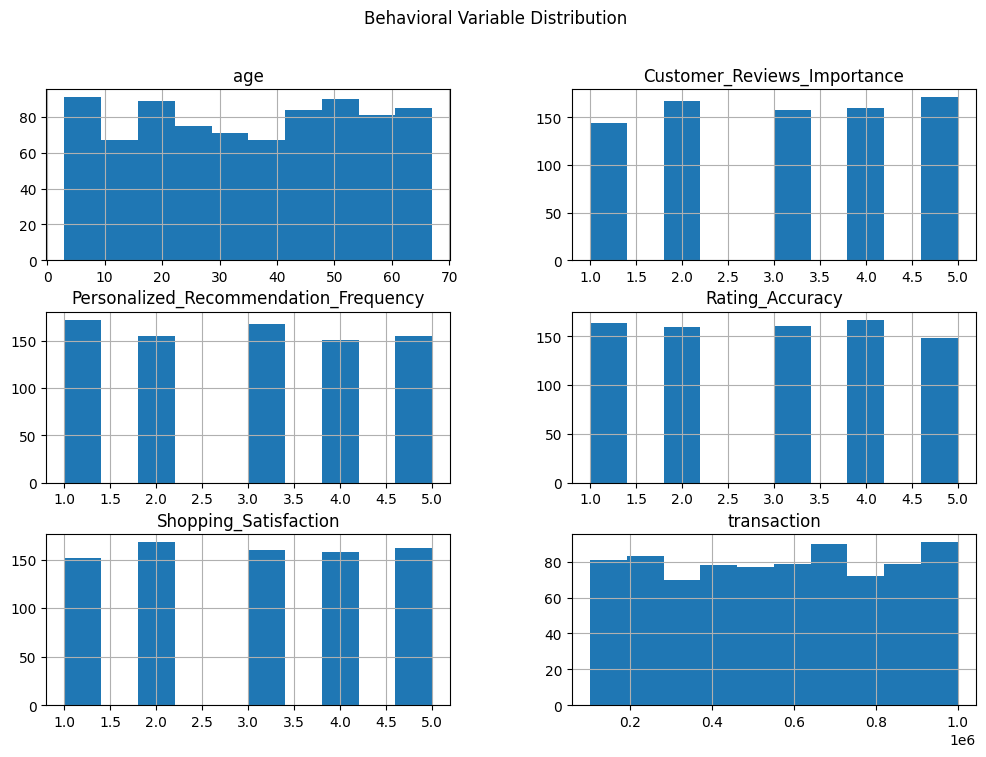

In [133]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
display(df[numeric_cols].describe())
df[numeric_cols].hist(figsize=(12,8))
plt.suptitle("Behavioral Variable Distribution", fontsize=12)
plt.show()

In [134]:
#Task 3: Customer Segmentation and Profiling

In [135]:
#Segment customers based on purchase frequency and shopping satisfaction levels.

In [136]:
required_cols = ["Purchase_Frequency", "Shopping_Satisfaction"]
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

df["Shopping_Satisfaction"] = pd.to_numeric(df["Shopping_Satisfaction"], errors="coerce")
df["Purchase_Frequency"] = df["Purchase_Frequency"].astype(str).str.lower().replace({"less than once a month": 1,"once a month": 2,
    "few times a month": 3,"once a week": 4,"multiple times a week": 5})

df["Purchase_Frequency"] = pd.to_numeric(df["Purchase_Frequency"], errors="coerce")

/tmp/ipython-input-635189067.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Purchase_Frequency"] = df["Purchase_Frequency"].astype(str).str.lower().replace({"less than once a month": 1,"once a month": 2,


In [49]:
#Create profiles such as:
#Frequent Buyers: High purchase frequency, high satisfaction.
# Occasional Shoppers: Medium frequency, moderate satisfaction.
# At-Risk Customers: Low satisfaction or frequent cart abandonment.

In [137]:
def segment_customer(row):
    if row["Purchase_Frequency"] >= 3 and row["Shopping_Satisfaction"] >= 4:
        return "Frequent Buyer"
    elif row["Purchase_Frequency"] == 2:
        return "Occasional Shopper"
    elif row["Shopping_Satisfaction"] <= 2:
        return "At-Risk Customer"
    else:
        return "General Customer"

df["Customer_Segment"] = df.apply(segment_customer, axis=1)
print(df["Customer_Segment"].value_counts())

Customer_Segment
At-Risk Customer      249
General Customer      198
Frequent Buyer        185
Occasional Shopper    168
Name: count, dtype: int64


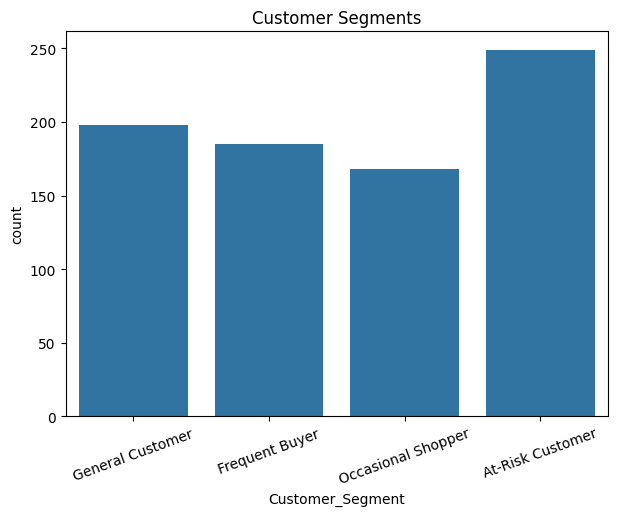

In [138]:
plt.figure(figsize=(7,5))
sns.countplot(x=df["Customer_Segment"])
plt.title("Customer Segments")
plt.xticks(rotation=20)
plt.show()

In [52]:
#Analyze demographic or behavioral differences across these segments.

In [139]:
segment_stats = df.groupby('Customer_Segment').agg(Mean_Age=('age', 'mean'),Median_Satisfaction=('Shopping_Satisfaction', 'median'),
    Count=('age', 'size')).round(1)
print(segment_stats)

                    Mean_Age  Median_Satisfaction  Count
Customer_Segment                                        
At-Risk Customer        36.4                  2.0    249
Frequent Buyer          33.7                  4.0    185
General Customer        35.0                  3.0    198
Occasional Shopper      35.3                  3.0    168


In [140]:
gender_by_segment = pd.crosstab(df['Customer_Segment'], df['Gender'], normalize='index').mul(100).round(1)
print(gender_by_segment)


at_risk_df = df[df['Customer_Segment'] == 'At-Risk Customers'].copy()
if not at_risk_df.empty:
    abandonment_series_at_risk = at_risk_df['Cart_Abandonment_Factors'].str.split(',').explode().str.strip()
    top_abandonment_at_risk = abandonment_series_at_risk.value_counts().head(5)
    print(top_abandonment_at_risk)

Gender              female  male  others  prefer not to say
Customer_Segment                                           
At-Risk Customer      21.7  28.1    23.3               26.9
Frequent Buyer        23.2  27.0    25.4               24.3
General Customer      27.3  23.7    26.8               22.2
Occasional Shopper    27.4  25.0    26.2               21.4


/tmp/ipython-input-4174855407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer_Segment', y='Shopping_Satisfaction', data=df, order=segment_order, palette='viridis')


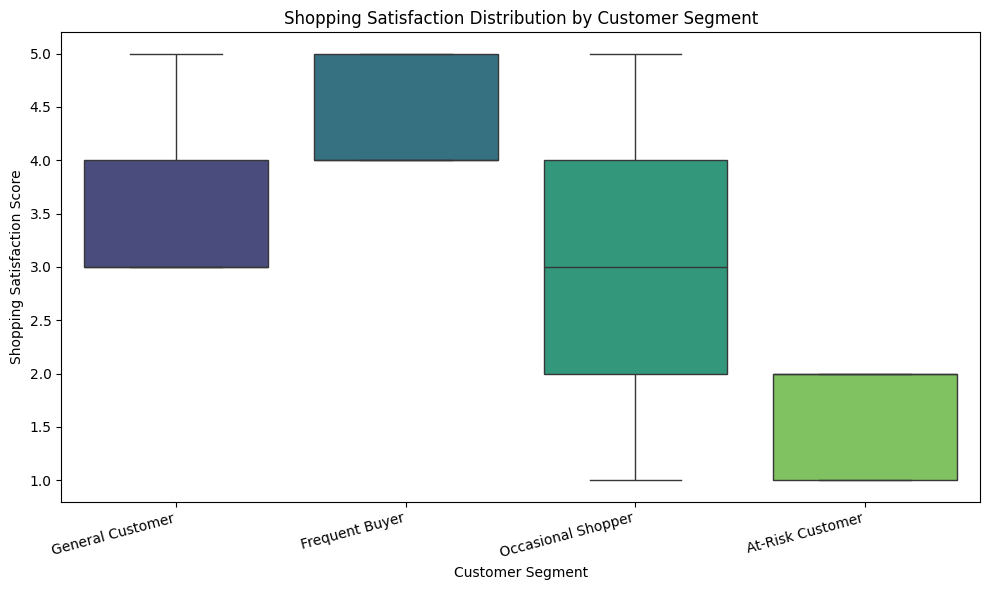

In [141]:
plt.figure(figsize=(10, 6))
segment_order = df['Customer_Segment'].unique().tolist()
sns.boxplot(x='Customer_Segment', y='Shopping_Satisfaction', data=df, order=segment_order, palette='viridis')
plt.title('Shopping Satisfaction Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Shopping Satisfaction Score')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()

Gender,female,male,others,prefer not to say
Customer_Segment,,,,
At-Risk Customer,54,70,58,67
Frequent Buyer,43,50,47,45
General Customer,54,47,53,44
Occasional Shopper,46,42,44,36


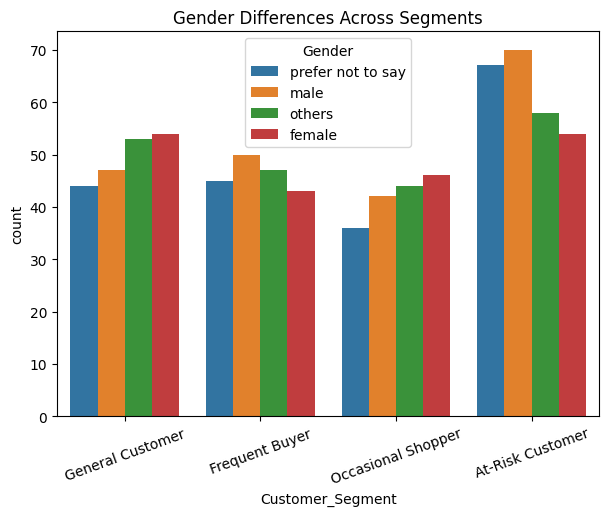

In [142]:
display(pd.crosstab(df["Customer_Segment"], df["Gender"]))
plt.figure(figsize=(7,5))
sns.countplot(x="Customer_Segment", hue="Gender", data=df)
plt.title("Gender Differences Across Segments")
plt.xticks(rotation=20)
plt.show()

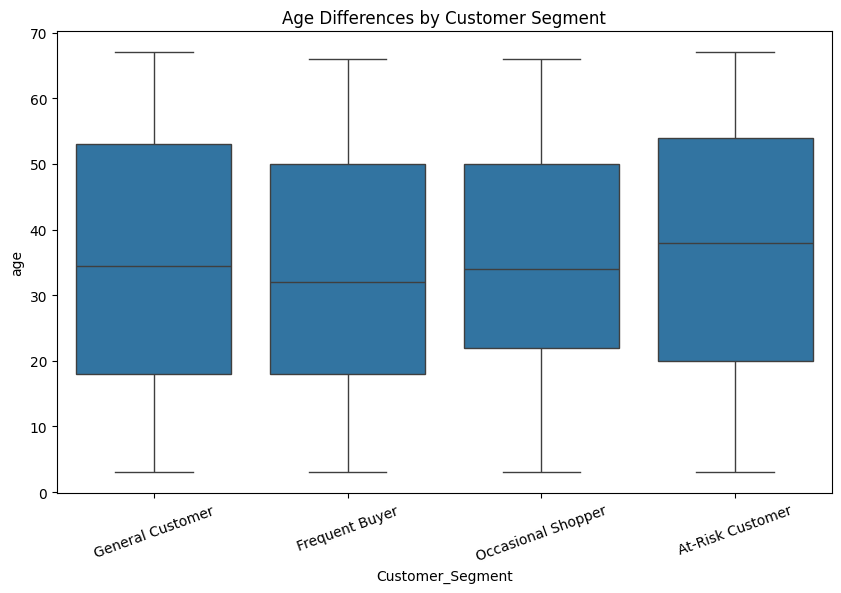

In [143]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Customer_Segment", y="age", data=df)
plt.title("Age Differences by Customer Segment")
plt.xticks(rotation=20)
plt.show()

In [58]:
#Use clustering (e.g., K-Means) for behavioral grouping based on survey responses.

In [144]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [145]:
behavioral_features = ["Shopping_Satisfaction","Customer_Reviews_Importance","Rating_Accuracy","Service_Rating","Purchase_Frequency"]

kmeans_elbow_method
K-Means Clustering performed with K=4.
Cluster sizes:
Cluster
0.0    223
1.0    195
2.0    193
3.0    189
Name: count, dtype: int64
K-Means Cluster Profiles
           age  Shopping_Satisfaction  Recommendation_Helpfulness  \
Cluster                                                             
0.0      40.57                   3.91                         0.0   
1.0      16.55                   1.89                         0.0   
2.0      52.97                   1.83                         0.0   
3.0      29.83                   4.32                         0.0   

         Rating_Accuracy  Most_Common_Frequency Most_Common_Gender  
Cluster                                                             
0.0                 1.57                      5             female  
1.0                 2.94                      3               male  
2.0                 3.38                      3             female  
3.0                 4.23                      1  prefer not to 

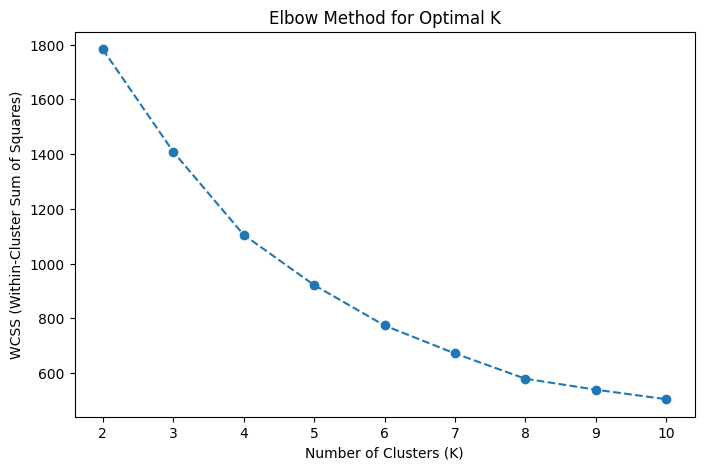

In [147]:
selected_cluster_features_names = ['age','Shopping_Satisfaction','Recommendation_Helpfulness','Rating_Accuracy']

if 'Recommendation_Helpfulness' in df.columns:
    mapping = {"yes": 1, "sometimes": 0.5, "no": 0}
    df['Recommendation_Helpfulness'] = df['Recommendation_Helpfulness'].astype(str).str.lower().map(mapping)

    df['Recommendation_Helpfulness'] = pd.to_numeric(df['Recommendation_Helpfulness'], errors='coerce')

    median_val = df['Recommendation_Helpfulness'].median()
    df['Recommendation_Helpfulness'] = df['Recommendation_Helpfulness'].fillna(median_val if not pd.isna(median_val) else 0)
else:
    pass

existing_cluster_features = [col for col in selected_cluster_features_names if col in df.columns]
if not existing_cluster_features:
    raise ValueError("No valid cluster features found in DataFrame for clustering")

cluster_features = df[existing_cluster_features].copy()
cluster_features = cluster_features.dropna()

if cluster_features.empty:
    raise ValueError("Cluster features DataFrame is empty after dropping NaNs. Cannot perform clustering.")

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

wcss = []
max_k = min(11, scaled_features.shape[0] + 1)
if max_k > 2:
    for i in range(2, max_k):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(scaled_features)
        wcss.append(kmeans.inertia_)


    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_k), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    print("kmeans_elbow_method")
else:
    print("Not enough data points or range for Elbow Method (requires at least 2 clusters).")


K = 4
if K > scaled_features.shape[0]:
    print(f"Warning: Desired number of clusters K={K} is greater than the number of samples ({scaled_features.shape[0]}). Adjusting K to {scaled_features.shape[0]}.")
    K = scaled_features.shape[0]
    if K < 1:
        raise ValueError("Cannot perform K-Means clustering with less than 1 sample.")

kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42, n_init=10)
df_temp = df.loc[cluster_features.index].copy()
df_temp['Cluster'] = kmeans.fit_predict(scaled_features)
df.loc[cluster_features.index, 'Cluster'] = df_temp['Cluster']

print(f"K-Means Clustering performed with K={K}.")
print(f"Cluster sizes:\n{df['Cluster'].value_counts()}")


profiling_columns = existing_cluster_features + ['Purchase_Frequency', 'Gender']
profiling_columns = [col for col in profiling_columns if col in df.columns]


clustered_df = df.loc[cluster_features.index].copy()
cluster_profile = clustered_df.groupby('Cluster')[existing_cluster_features].mean().round(2)


cluster_profile_categorical = clustered_df.groupby('Cluster')['Purchase_Frequency'].agg(Most_Common_Frequency=lambda x: x.mode()[0])
cluster_gender_mode = clustered_df.groupby('Cluster')['Gender'].agg(Most_Common_Gender=lambda x: x.mode()[0])
final_cluster_profile = pd.concat([cluster_profile, cluster_profile_categorical, cluster_gender_mode], axis=1)

print("K-Means Cluster Profiles")
print(final_cluster_profile)


In [148]:
#Task 4: Recommendation and Review Insights

In [63]:
#Examine the relationship between recommendation helpfulness and shopping satisfaction.

In [149]:
df["Recommendation_Helpfulness"] = pd.to_numeric(df["Recommendation_Helpfulness"], errors="coerce")
df["Shopping_Satisfaction"] = pd.to_numeric(df["Shopping_Satisfaction"], errors="coerce")



In [150]:
clean_df = df.dropna(subset=["Recommendation_Helpfulness", "Shopping_Satisfaction"])


In [151]:
correlation = clean_df["Recommendation_Helpfulness"].corr(clean_df["Shopping_Satisfaction"])
print("Correlation between recommendation helpfulness and shopping satisfaction:", correlation)


Correlation between recommendation helpfulness and shopping satisfaction: nan


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


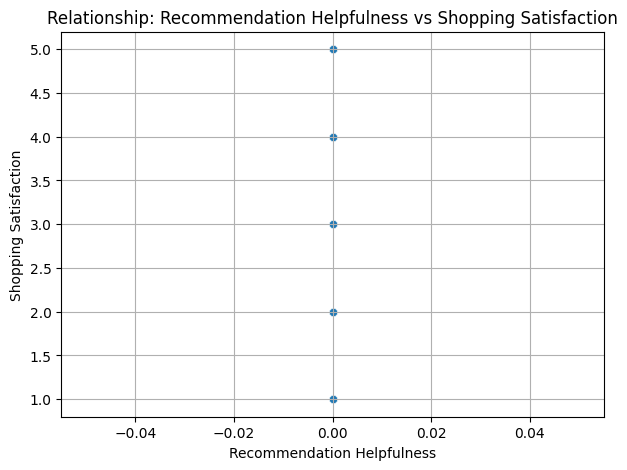

In [152]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=clean_df,
    x="Recommendation_Helpfulness",
    y="Shopping_Satisfaction"
)
plt.title("Relationship: Recommendation Helpfulness vs Shopping Satisfaction")
plt.xlabel("Recommendation Helpfulness")
plt.ylabel("Shopping Satisfaction")
plt.grid(True)
plt.show()

In [153]:
#Evaluate how review reliability and helpfulness impact overall ratings.

In [154]:
reliability_impact = df.groupby('Review_Reliability')['Rating_Accuracy'].mean().sort_values(ascending=False).to_frame().round(3)
print("Mean Rating Accuracy by Review Reliability:")
print(reliability_impact)

Mean Rating Accuracy by Review Reliability:
                    Rating_Accuracy
Review_Reliability                 
Moderately                    3.205
Heavily                       3.024
Rarely                        2.920
Occasionally                  2.857
Never                         2.843


/tmp/ipython-input-1494612900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Review_Reliability', y='Rating_Accuracy', data=reliability_impact_df, palette='Reds')


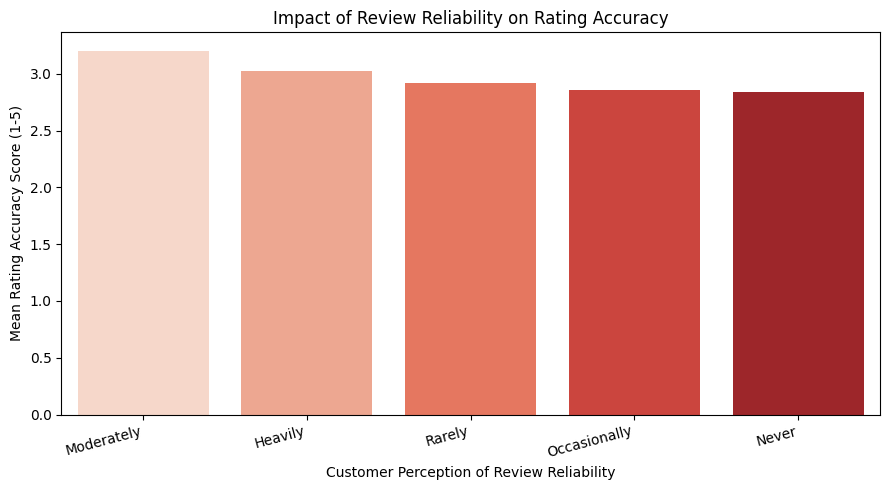

In [155]:
reliability_impact_df = reliability_impact.reset_index()
plt.figure(figsize=(9, 5))
sns.barplot(x='Review_Reliability', y='Rating_Accuracy', data=reliability_impact_df, palette='Reds')
plt.title('Impact of Review Reliability on Rating Accuracy')
plt.xlabel('Customer Perception of Review Reliability')
plt.ylabel('Mean Rating Accuracy Score (1-5)')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()

In [156]:
helpfulness_impact = df.groupby('Review_Helpfulness')['Rating_Accuracy'].mean().sort_values(ascending=False).to_frame().round(3)
print("Mean Rating Accuracy by Review Helpfulness:")
print(helpfulness_impact)

Mean Rating Accuracy by Review Helpfulness:
                    Rating_Accuracy
Review_Helpfulness                 
No                            3.035
Yes                           2.965
Sometimes                     2.898


/tmp/ipython-input-3781515292.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Review_Helpfulness', y='Rating_Accuracy', data=helpfulness_impact_df, palette='Oranges')


Text(0, 0.5, 'Mean Rating Accuracy Score')

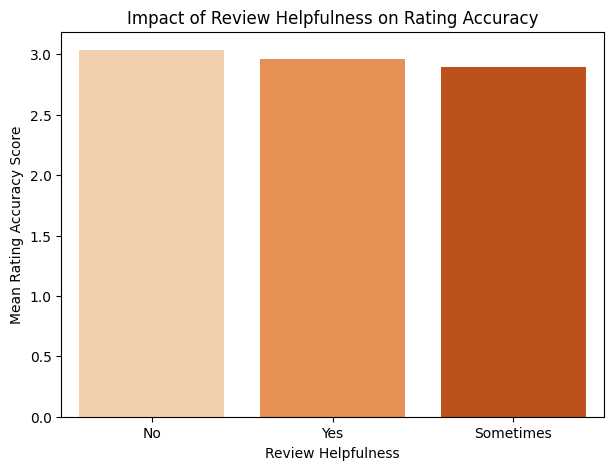

In [157]:
helpfulness_impact_df = helpfulness_impact.reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x='Review_Helpfulness', y='Rating_Accuracy', data=helpfulness_impact_df, palette='Oranges')
plt.title('Impact of Review Helpfulness on Rating Accuracy')
plt.xlabel('Review Helpfulness')
plt.ylabel('Mean Rating Accuracy Score')

In [158]:
#Identify trends in how often customers engage with or trust personalized recommendations.

In [159]:
rec_engagement = df.iloc[:, 5].value_counts(normalize=True).mul(100).round(1).to_frame(name='Percentage')
print("Personalized Recommendation Engagement Trends (%)")
print(rec_engagement)


Personalized Recommendation Engagement Trends (%)
                                       Percentage
Personalized_Recommendation_Frequency            
Yes                                          34.8
No                                           34.0
Sometimes                                    31.2


/tmp/ipython-input-3637899262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Personalized_Recommendation_Frequency', y='Percentage', data=rec_engagement_df, palette='cubehelix')


Text(0, 0.5, 'Percentage of Customers')

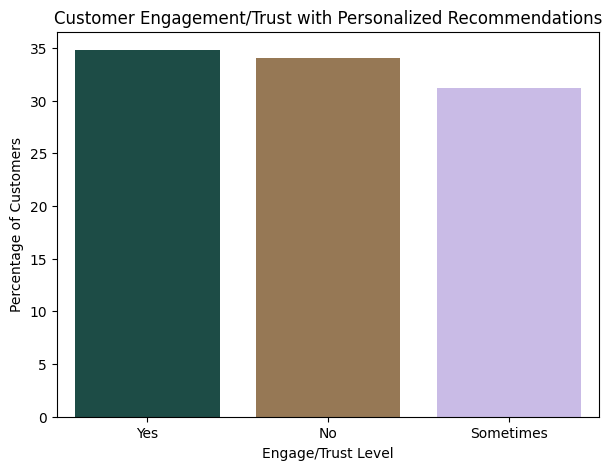

In [160]:
rec_engagement_df = rec_engagement.reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x='Personalized_Recommendation_Frequency', y='Percentage', data=rec_engagement_df, palette='cubehelix')
plt.title('Customer Engagement/Trust with Personalized Recommendations')
plt.xlabel('Engage/Trust Level')
plt.ylabel('Percentage of Customers')

In [161]:
#Suggest actionable insights for improving Amazon’s recommendation system

In [162]:
insights = []

if 'Recommendation_Helpfulness' in df.columns and 'Shopping_Satisfaction' in df.columns:
    temp_df = df[['Recommendation_Helpfulness', 'Shopping_Satisfaction']].dropna()
    if not temp_df.empty:
        corr1 = temp_df['Recommendation_Helpfulness'].corr(temp_df['Shopping_Satisfaction'])
    else:
        corr1 = 0
else:
    corr1 = 0


if corr1 > 0.3:
    insights.append("Helpful recommendations strongly increase shopping satisfaction.")

if "Review_Reliability" in df.columns and "Overall_Rating" in df.columns:
    corr2 = df["Review_Reliability"].corr(df["Overall_Rating"])
    if corr2 > 0.3:
        insights.append("Reliable and consistent reviews have a strong positive impact on overall ratings.")


if "Trust_in_Recommendations" in df.columns:
    insights.append("Customers who trust recommendations tend to show higher satisfaction scores.")

if "Recommendation_Helpfulness" in df.columns:

    if df["Recommendation_Helpfulness"].mean() < 3:
        insights.append("Low recommendation helpfulness indicates a need to personalize recommendations better.")

for item in insights:
    print(item)

if len(insights) == 0:
    print("No strong insights detected")

Low recommendation helpfulness indicates a need to personalize recommendations better.


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [163]:
#Task 5: Visualization and Reporting

In [164]:
#Create attractive visualizations (bar charts, heatmaps, pie charts) for:
# Purchase categories
# Browsing frequency distribution
# Satisfaction levels
# Correlation between recommendation usefulness and satisfaction

In [165]:
import plotly.express as px

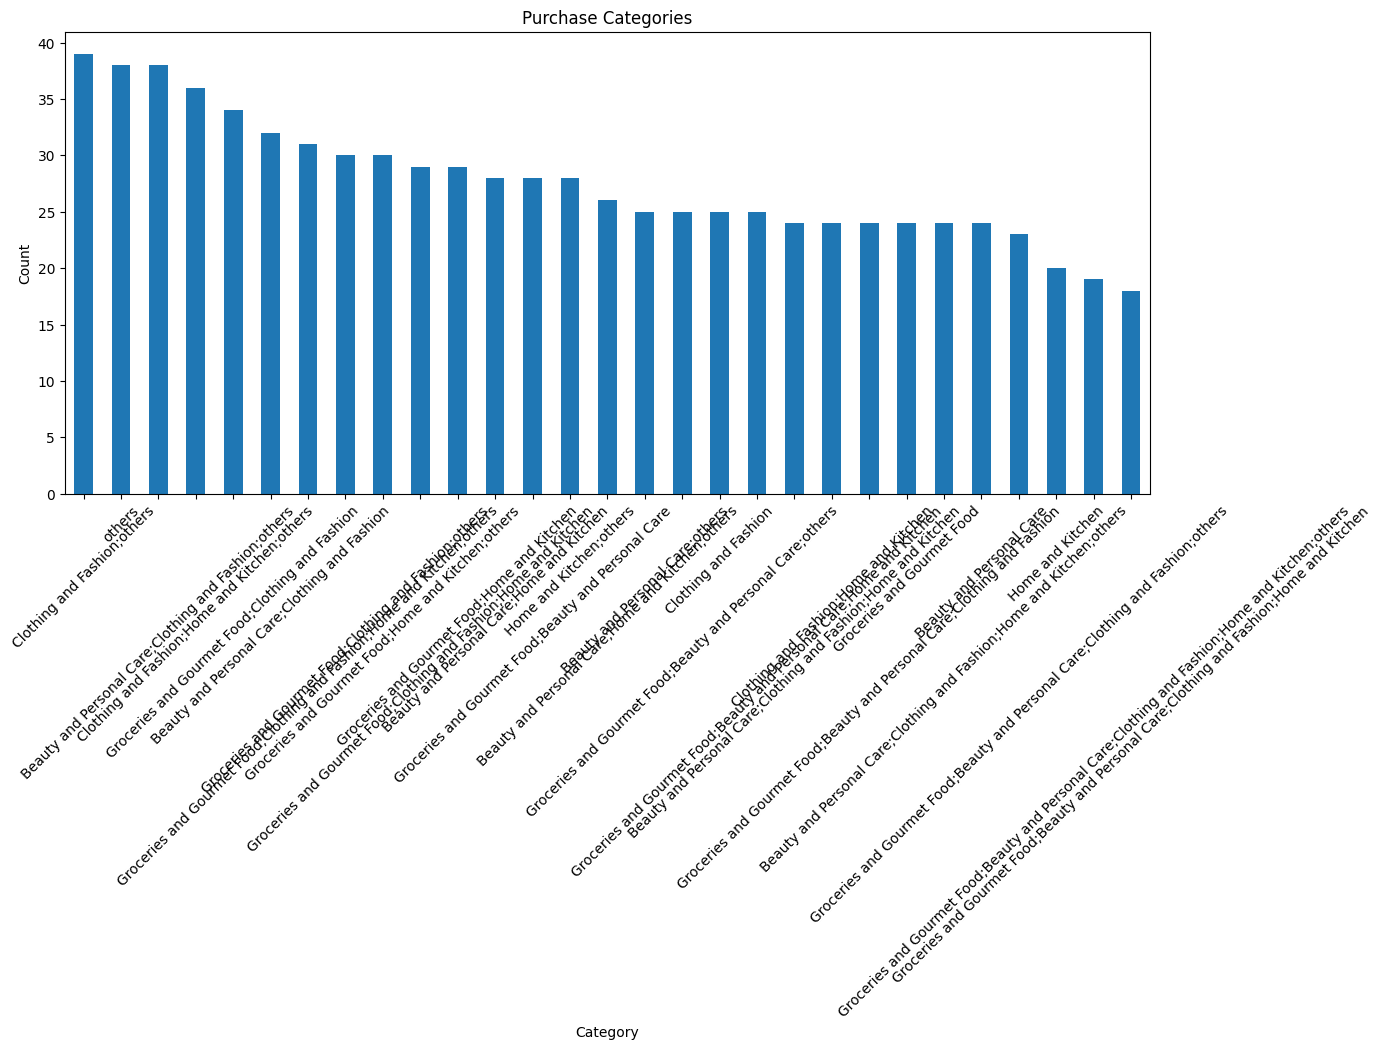

In [166]:
plt.figure(figsize=(14,6))
df['Purchase_Categories'].value_counts().plot(kind='bar')
plt.title('Purchase Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

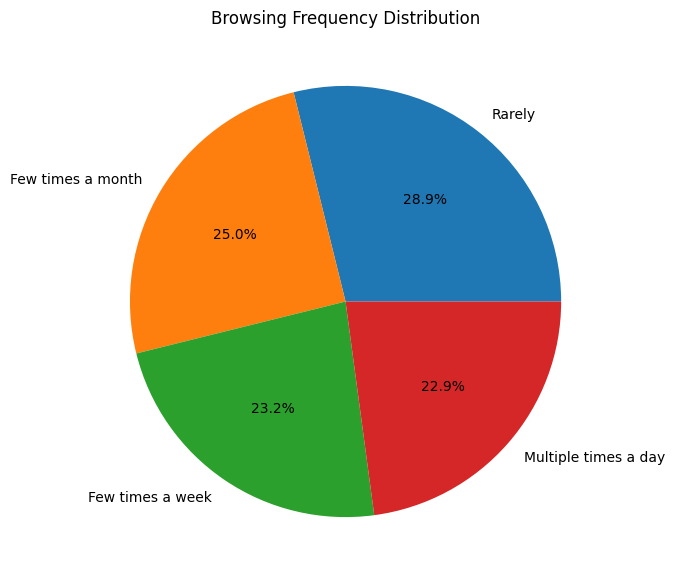

In [167]:
plt.figure(figsize=(7,7))
df['Browsing_Frequency'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Browsing Frequency Distribution')
plt.ylabel('')
plt.show()

/tmp/ipython-input-2075462382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shopping_Satisfaction', data=df, palette='viridis')


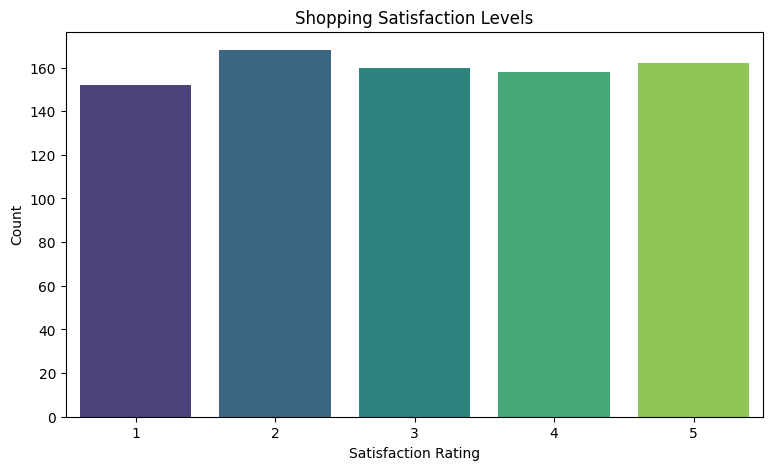

In [168]:
plt.figure(figsize=(9,5))
sns.countplot(x='Shopping_Satisfaction', data=df, palette='viridis')
plt.title('Shopping Satisfaction Levels')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.show()

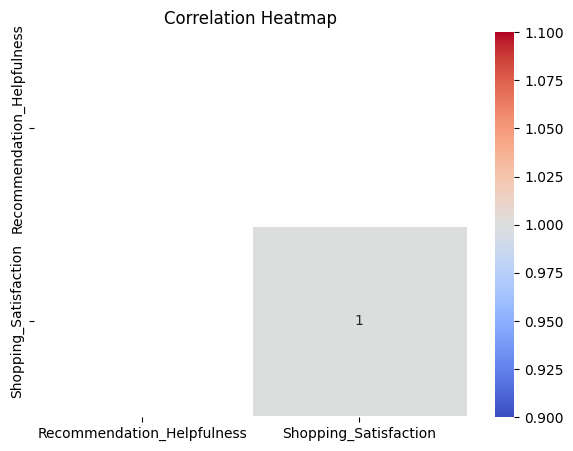

In [169]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['Recommendation_Helpfulness', 'Shopping_Satisfaction']].corr(),
            annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()


In [170]:
#Summarize findings in a clear and visually appealing dashboard or report format.

/tmp/ipython-input-1041499269.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Browsing_Frequency',data=df,palette='viridis',ax=axes[0, 1])
/tmp/ipython-input-1041499269.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shopping_Satisfaction',data=df,palette='magma',order=sorted(df['Shopping_Satisfaction'].unique()),ax=axes[1, 0])


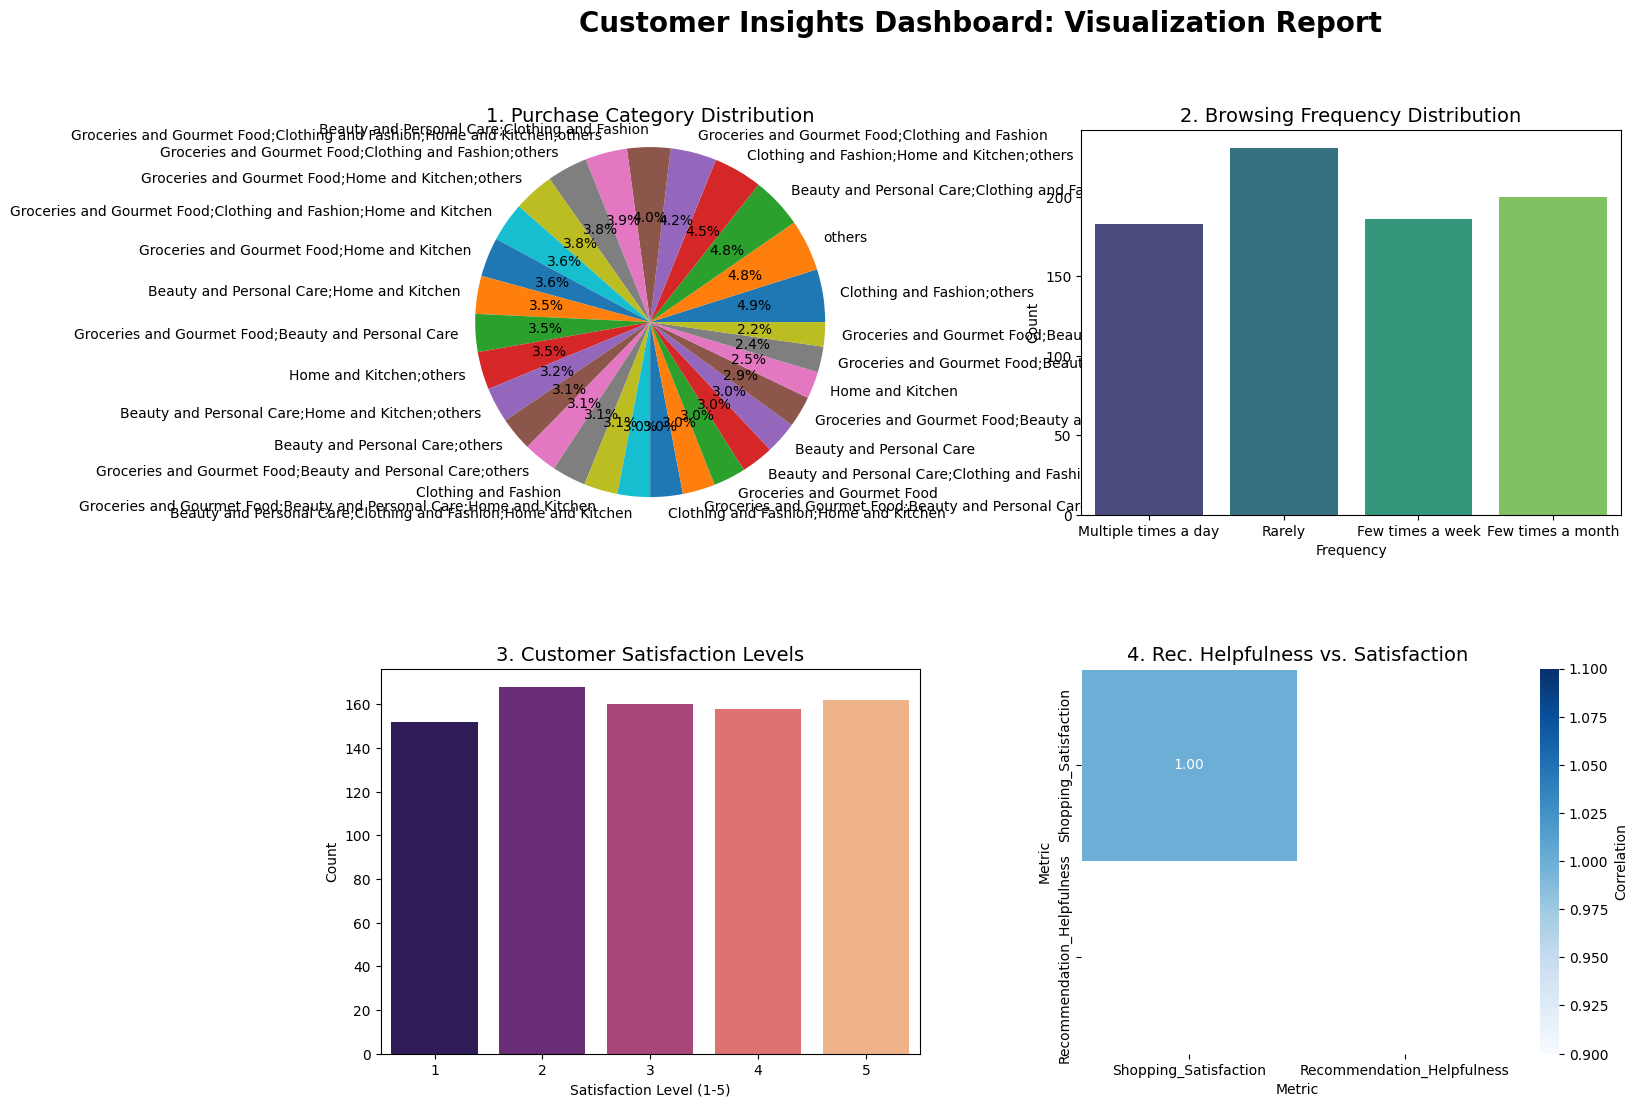

In [171]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Customer Insights Dashboard: Visualization Report', fontsize=20, fontweight='bold')

category_counts = df['Purchase_Categories'].value_counts()
axes[0, 0].pie(category_counts,labels=category_counts.index,autopct='%1.1f%%',textprops={'fontsize': 10})
axes[0, 0].set_title('1. Purchase Category Distribution', fontsize=14)
axes[0, 0].axis('equal')


sns.countplot(x='Browsing_Frequency',data=df,palette='viridis',ax=axes[0, 1])
axes[0, 1].set_title('2. Browsing Frequency Distribution', fontsize=14)
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Count')


sns.countplot(x='Shopping_Satisfaction',data=df,palette='magma',order=sorted(df['Shopping_Satisfaction'].unique()),ax=axes[1, 0])
axes[1, 0].set_title('3. Customer Satisfaction Levels', fontsize=14)
axes[1, 0].set_xlabel('Satisfaction Level (1-5)')
axes[1, 0].set_ylabel('Count')


correlation_data = df[['Shopping_Satisfaction', 'Recommendation_Helpfulness']].corr()
sns.heatmap(correlation_data,annot=True,cmap='Blues',fmt=".2f",linewidths=.5,ax=axes[1, 1],cbar_kws={'label': 'Correlation'})
axes[1, 1].set_title('4. Rec. Helpfulness vs. Satisfaction', fontsize=14)
axes[1, 1].set_xlabel('Metric')
axes[1, 1].set_ylabel('Metric')

plt.show()

In [172]:
print("Summary of Key Findings")
print(f"1. Purchase Categories:** {category_counts.index[0]} is the largest category, accounting for {category_counts.iloc[0]/category_counts.sum()*100:.1f}% of purchases.")
print(f"2. Browsing Frequency:** The majority of customers browse {' or '.join(df['Browsing_Frequency'].value_counts().head(2).index)}.")
print(f"3. Satisfaction Levels:** The mode satisfaction level is {df['Shopping_Satisfaction'].mode()[0]}, suggesting a general level of customer happiness.")
print(f"4. Recommendation Correlation (Heatmap):** Analysis of the heatmap suggests:")

correlation_value = correlation_data.loc['Shopping_Satisfaction', 'Recommendation_Helpfulness']
relationship_strength = "strong" if abs(correlation_value) > 0.5 else ("moderate" if abs(correlation_value) > 0.2 else "weak")
relationship_direction = "positive" if correlation_value > 0 else "negative"

print(f" There appears to be a {relationship_strength} {relationship_direction} relationship (correlation: {correlation_value:.2f}) between recommendation helpfulness and shopping satisfaction.")
print("Note: Higher recommendation helpfulness does not necessarily mean higher satisfaction, and vice versa, as correlation is very low.")

Summary of Key Findings
1. Purchase Categories:** Clothing and Fashion;others is the largest category, accounting for 4.9% of purchases.
2. Browsing Frequency:** The majority of customers browse Rarely or Few times a month.
3. Satisfaction Levels:** The mode satisfaction level is 2, suggesting a general level of customer happiness.
4. Recommendation Correlation (Heatmap):** Analysis of the heatmap suggests:
 There appears to be a weak negative relationship (correlation: nan) between recommendation helpfulness and shopping satisfaction.
Note: Higher recommendation helpfulness does not necessarily mean higher satisfaction, and vice versa, as correlation is very low.
